## C R E  Price Predictor 

In [1]:
# bosten housing data 
# 13 continious 
# 1 binary
# total 13 feature and 1 label

In [2]:
import pandas as pd

In [3]:
housing_df = pd.read_csv("data.csv")

In [4]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [6]:
# checking categorical values
housing_df['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.288106,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.703926,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
# count - count of row by ignoring null values
# mean  - Average values
# std   - standared deviation(spread of values)
# 25%   - 25 % values is less than 0.08..(in CRIME column) (0f the observation)
# ..
# ..
# min   - minimum value
# max   - maximum value

In [9]:
%matplotlib inline


In [10]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

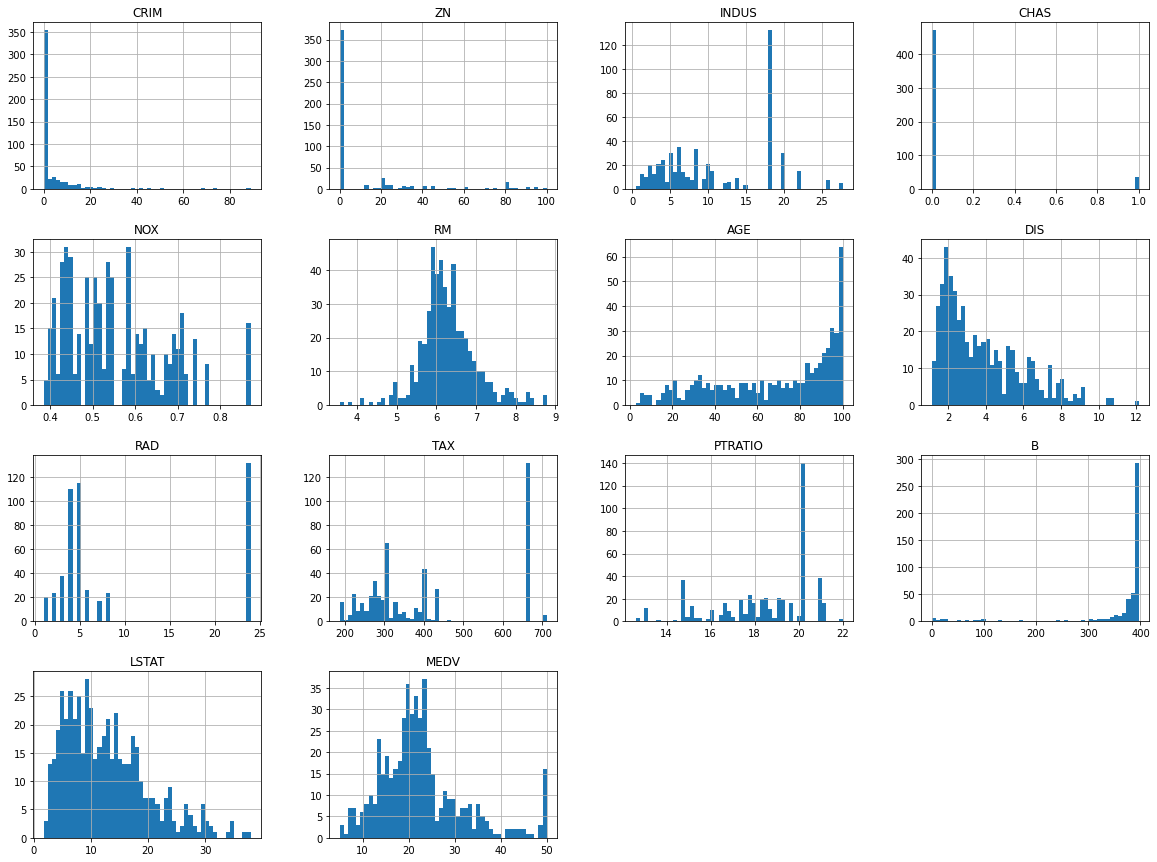

In [11]:
housing_df.hist(bins=50, figsize=(20, 15))

# Train-Test Spliting

In [12]:
# import numpy as np
# # ramdom.seed take fixed random values 
# def split_train_test(data, test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     print(shuffled)
    
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices],data.iloc[test_indices]

In [13]:
# train_set, test_set = split_train_test(housing_df, 0.2)

In [14]:
# print("len of train_set ",len(train_set))
# print("len of test_set ",len(test_set))

In [15]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing_df, test_size=0.2, random_state=42)

In [16]:
print(f"len of train_set:{len(train_set)}\n len of test_set:{len(test_set)}")

len of train_set:404
 len of test_set:102


In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
# import numpy as np

# split is inbuilt function of StratifiedShuffleSplit
# np.random.seed(42)
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing_df, housing_df['CHAS']):
    start_train_set = housing_df.loc[train_index]
    start_test_set = housing_df.loc[test_index]


In [18]:
start_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       400 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In [19]:
start_train_set["CHAS"].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [20]:
#Total values of 0/ total values of 1 (intest)
#Total values of 0/ total values of 1 (intrain)
# these two values in case of CHAS feature must be equal 
# so that using Stratified shuffe

In [21]:
housing_df = start_train_set.copy()

## Correlations

In [22]:
# can find outlier
corr_matrix = housing_df.corr()

In [23]:
# positive values are directly proportional
# Neagative values are inversely proportional
corr_matrix = housing_df.corr()
corr_matrix['MEDV'].sort_values(ascending=False)


MEDV       1.000000
RM         0.677953
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [24]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

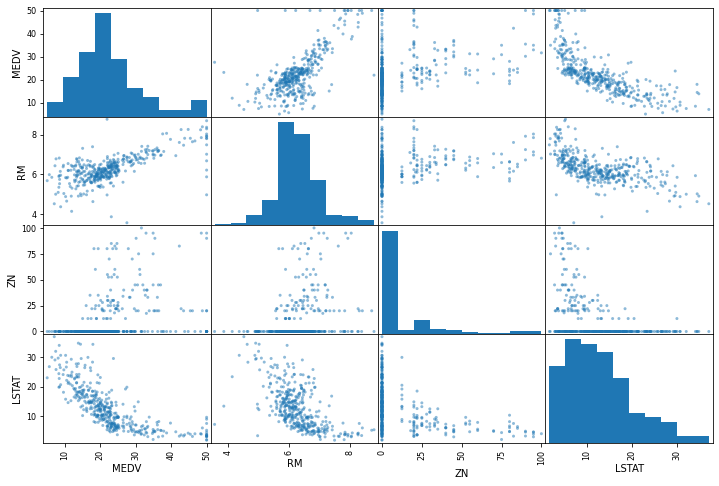

In [25]:
attributes = ["MEDV",'RM','ZN','LSTAT']
scatter_matrix(housing_df[attributes], figsize=(12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

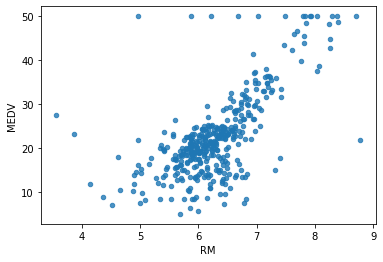

In [26]:
# can find outlier
# caping value at 50 (ask for issue)

housing_df.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

# Attribute combination

In [27]:
# Will find tax per room

In [28]:
housing_df["TAX per RM"] = housing_df["TAX"]/housing_df['RM']

In [29]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAX per RM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [30]:
corr_matrix = housing_df.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV          1.000000
RM            0.677953
B             0.361761
ZN            0.339741
DIS           0.240451
CHAS          0.205066
AGE          -0.364596
RAD          -0.374693
CRIM         -0.393715
NOX          -0.422873
TAX          -0.456657
INDUS        -0.473516
PTRATIO      -0.493534
TAX per RM   -0.524099
LSTAT        -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAX per RM', ylabel='MEDV'>

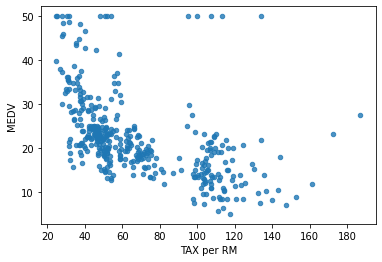

In [31]:
housing_df.plot(kind="scatter",x="TAX per RM",y="MEDV",alpha=0.8)

In [32]:
housing_df = start_train_set.drop("MEDV",axis= 1)
housing_label = start_train_set['MEDV'].copy()

## Missing attributes

In [33]:
# 1.get rid of missing attibutes 
# 2.get rid of whole atribute
# 3.set missing attibute to some values (mean, 0, median)

In [34]:
median = housing_df['RM'].median()

In [35]:
housing_df["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [36]:
# saving median for test set also
# fiting up median values for any null values 

In [37]:
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(housing_df)

SimpleImputer(strategy='median')

In [38]:
X = imputer.transform(housing_df)

In [39]:
housing_tr = pd.DataFrame(X,columns=housing_df.columns)

In [40]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.282879,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.710457,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.213500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit_Learn Design

objects:

1.Estimators:It estimates some parameters based on a datasets. 
Imputers(filled all null values with median in our data set)

2.Transformer: It takes the input and return the output form fit() 
also has convenience function called fit_transform() which fit first and then transform

3.Predictors: LinearRegression model is an example of predictors,fit() and predictors() 
are some common function also has score() function which evaluate predictions

## Feature scaling

1.Normalization (Min max scaling):(value-min/max-min) values will be in range 0 to 1
    Sklearn provides a class called MinMaxScaler

2.Standardization: (value-mean)/(standared deviation)
    Sklearn provides a class called standardScaler

## Creating Pipeline

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([('imputer',SimpleImputer(strategy="median")),("std_scaler",StandardScaler()),])

In [42]:
# Numpy array
housing_tr_num = my_pipeline.fit_transform(housing_df)

In [43]:
housing_tr_num

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [44]:
housing_tr_num.shape

(404, 13)

## Model Selection

In [45]:
#Since mse is 23
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()

# from sklearn.tree import DecisionTreeRegressor
# model = DecisionTreeRegressor()

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

model.fit(housing_tr_num,housing_label)

RandomForestRegressor()

In [46]:
trial_data = housing_df.iloc[:5]

In [47]:
trial_label = housing_label.iloc[:5]

In [48]:
prepered_data = my_pipeline.transform(trial_data)

In [49]:
model.predict(prepered_data)

array([22.237, 25.496, 16.344, 23.3  , 23.423])

In [50]:
list(trial_label)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Model Evaluation

In [51]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_tr_num)
mse = mean_squared_error(housing_label,housing_predictions)
rmse = np.sqrt(mse)

In [52]:
rmse

1.2782602357102475

In [53]:
# overfitting : learn noise also error is 00 


## Cross Validation (Better evaluation technique)

In [54]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model,housing_tr_num,housing_label,scoring='neg_mean_squared_error',cv=10)
rmse_score = np.sqrt(-score)

In [55]:
rmse_score

array([2.77992263, 2.76741559, 4.43897947, 2.74350068, 3.44989469,
       2.63031075, 4.68532015, 3.31684448, 3.22879681, 3.25948043])

In [56]:
def print_scores(score):
    print("Scores", score)
    print("Mean",score.mean())
    print("Standared Deviation",score.std())

In [57]:
print_scores(rmse_score)

Scores [2.77992263 2.76741559 4.43897947 2.74350068 3.44989469 2.63031075
 4.68532015 3.31684448 3.22879681 3.25948043]
Mean 3.3300465668685897
Standared Deviation 0.6744719331330821


## Model Saving

In [58]:
from joblib import dump,load
dump(model,"Housing.joblib")

['Housing.joblib']

## Model Testing

In [59]:
X_test = start_test_set.drop("MEDV",axis=1)
Y_test = start_test_set["MEDV"].copy()
X_text_prepeared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_text_prepeared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

In [60]:
final_rmse

2.8933703174874856

In [63]:
prepered_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.2464549 , -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Model Use

In [64]:
from joblib import dump, load
model = load("Housing.joblib")

import numpy as np

features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.2464549 , -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)


array([22.237])